In [409]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load Flight Fare Dataset

- Load all datasets

In [410]:
file_path = '../datasets/US_Airfare.csv'
airfare_data = pd.read_csv(file_path)

file_path = '../datasets/US_AirTraffic.csv'
airtraffic_data = pd.read_csv(file_path)

file_path = '../datasets/US_GDP.csv'
gdp_data = pd.read_csv(file_path)

file_path = '../datasets/US_Inflation.csv'
inflation_data = pd.read_csv(file_path)

file_path = '../datasets/US_JetFuelDomestic.xlsx'
fuel_data = pd.read_excel(file_path)

- Remove potential duplicates of all datasets

In [411]:
airfare_data.drop_duplicates(inplace=True)
airtraffic_data.drop_duplicates(inplace=True)
gdp_data.drop_duplicates(inplace=True)
inflation_data.drop_duplicates(inplace=True)
fuel_data.drop_duplicates(inplace=True)

### Airfare Dataset Processing

- Drop the data before 2014 since we are analysing the past 15 years flight fares

In [412]:
airfare_data = airfare_data[airfare_data['Year'] >= 2009].copy()
airfare_data

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,81.43
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,208.93
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,184.56
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,182.64
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",328,398,177.11
...,...,...,...,...,...,...,...,...,...
245950,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",665,207,278.70
245951,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,277,148.69
245952,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,70,330.19
245953,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,178,95.65


- Rename columns for better readability

In [413]:
airfare_data.rename(columns={'quarter': 'Quarter'}, inplace=True)
airfare_data.rename(columns={'citymarketid_1': 'OriginCityId'}, inplace=True)
airfare_data.rename(columns={'citymarketid_2': 'DestinationCityId'}, inplace=True)
airfare_data.rename(columns={'nsmiles': 'Miles'}, inplace=True)
airfare_data.rename(columns={'passengers': 'Passengers'}, inplace=True)
airfare_data.rename(columns={'fare': 'Fare'}, inplace=True)
airfare_data

,Year,Quarter,OriginCityId,DestinationCityId,city1,city2,Miles,Passengers,Fare
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,81.43
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,208.93
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,184.56
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,182.64
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",328,398,177.11
...,...,...,...,...,...,...,...,...,...
245950,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",665,207,278.70
245951,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,277,148.69
245952,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,70,330.19
245953,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,178,95.65


- Sort the dataset based on year and quarter column

In [414]:
airfare_data = airfare_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])
airfare_data = airfare_data.reset_index(drop=True)

- Drop city1 and city2 since machine learning models work with numbers

In [415]:
airfare_data.drop(columns=['city1'], inplace=True)
airfare_data.drop(columns=['city2'], inplace=True)
airfare_data

,Year,Quarter,OriginCityId,DestinationCityId,Miles,Passengers,Fare
0,2009,1,30466,33192,647,892,159.02
1,2009,1,32575,34100,2401,104,216.30
2,2009,1,30194,31123,551,545,115.57
3,2009,1,30279,30194,324,375,104.78
4,2009,1,30559,30852,2335,335,375.19
...,...,...,...,...,...,...,...
122861,2024,1,35412,31703,665,207,278.70
122862,2024,1,35412,32467,724,277,148.69
122863,2024,1,35412,32467,724,70,330.19
122864,2024,1,35412,33195,550,178,95.65


- Since OriginCityID and DestinationCityId needs to work as a pair to have any meaning, we combine it into a string

In [416]:
airfare_data['Route'] = airfare_data['OriginCityId'].astype(str) + '-' + airfare_data['DestinationCityId'].astype(str)

- Then we drop the OriginCityID and DestinationCityId

In [417]:
airfare_data.drop(columns=['OriginCityId'], inplace=True)
airfare_data.drop(columns=['DestinationCityId'], inplace=True)
airfare_data

,Year,Quarter,Miles,Passengers,Fare,Route
0,2009,1,647,892,159.02,30466-33192
1,2009,1,2401,104,216.30,32575-34100
2,2009,1,551,545,115.57,30194-31123
3,2009,1,324,375,104.78,30279-30194
4,2009,1,2335,335,375.19,30559-30852
...,...,...,...,...,...,...
122861,2024,1,665,207,278.70,35412-31703
122862,2024,1,724,277,148.69,35412-32467
122863,2024,1,724,70,330.19,35412-32467
122864,2024,1,550,178,95.65,35412-33195


- However, as indicated above, we also need to encode route string into number

In [418]:
label_encoder = LabelEncoder()

airfare_data['RouteEncoded'] = label_encoder.fit_transform(airfare_data['Route'])
airfare_data.drop(columns=['Route'], inplace=True)
airfare_data

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded
0,2009,1,647,892,159.02,173
1,2009,1,2401,104,216.30,760
2,2009,1,551,545,115.57,34
3,2009,1,324,375,104.78,110
4,2009,1,2335,335,375.19,195
...,...,...,...,...,...,...
122861,2024,1,665,207,278.70,918
122862,2024,1,724,277,148.69,919
122863,2024,1,724,70,330.19,919
122864,2024,1,550,178,95.65,921


### Air Traffic Dataset Processing

- Transform air traffic month into quarter to align with the airfare dataset time format

In [419]:
airtraffic_data['Quarter'] = ((airtraffic_data['Month'] - 1) // 3) + 1
airtraffic_data.drop(columns=['Month'], inplace=True) # Drop the month column
airtraffic_data['Dom_Pax'] = airtraffic_data['Dom_Pax'].str.replace(',', '').astype(float)
airtraffic_data['Dom_Flt'] = airtraffic_data['Dom_Flt'].str.replace(',', '').astype(float)
airtraffic_data['Dom_RPM'] = airtraffic_data['Dom_RPM'].str.replace(',', '').astype(float)

- Rename columns for better readability

In [420]:
airtraffic_data.rename(columns={'Dom_Pax': 'TotalDomesticPassenger'}, inplace=True)
airtraffic_data.rename(columns={'Dom_Flt': 'TotalDomesticFlight'}, inplace=True)
airtraffic_data.rename(columns={'Dom_RPM': 'TotalDomesticRevenue'}, inplace=True)

- Calculate the means of DomesticPassenger, DomesticFlight, DomesticRevenue with the same quarter

In [421]:
airtraffic_data = airtraffic_data.groupby(['Year', 'Quarter']).agg({
    'TotalDomesticPassenger': 'mean',
    'TotalDomesticFlight': 'mean',
    'TotalDomesticRevenue': 'mean'
}).reset_index()

airtraffic_data = airtraffic_data.round({
    'TotalDomesticPassenger': 1,
    'TotalDomesticFlight': 1,
    'TotalDomesticRevenue': 1
})

airtraffic_data

,Year,Quarter,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue
0,2003,1,44730643.3,757568.3,37378141.7
1,2003,2,49465042.7,784669.3,41653628.7
2,2003,3,51315051.3,814720.0,44041423.7
3,2003,4,48920516.7,794180.7,41171178.7
4,2004,1,47756435.0,794443.7,41065810.0
...,...,...,...,...,...
78,2022,3,66363913.0,649254.7,62344118.3
79,2022,4,64699169.7,613598.0,60525222.0
80,2023,1,61574251.3,609827.3,58241450.7
81,2023,2,70492616.0,654928.0,66319611.7


- Merge Air Traffic dataset into the processing dataset, fill the missing data with the lastest value 

In [422]:
df = pd.merge(airfare_data, airtraffic_data, on=['Year', 'Quarter'], how='left')
df['TotalDomesticPassenger'] = df['TotalDomesticPassenger'].ffill()
df['TotalDomesticFlight'] = df['TotalDomesticFlight'].ffill()
df['TotalDomesticRevenue'] = df['TotalDomesticRevenue'].ffill()
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7
...,...,...,...,...,...,...,...,...,...
122861,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3
122862,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3
122863,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3
122864,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3


## Domestic Jet Fuel Dataset Processing


- Transform jet fuel month into quarter to align with the airfare dataset time format


In [423]:
def month_to_quarter(month):
    month_to_quarter_map = {
        'January': 1, 'February': 1, 'March': 1,
        'April': 2, 'May': 2, 'June': 2,
        'July': 3, 'August': 3, 'September': 3,
        'October': 4, 'November': 4, 'December': 4
    }
    quarter = month_to_quarter_map[month]  # Map the month to its quarter
    return quarter

fuel_data['Quarter'] = fuel_data['Month'].apply(month_to_quarter)
fuel_data.drop(columns=['Month'], inplace=True) # Drop the month column

- Rename for better readability

In [424]:
fuel_data.rename(columns={"Cost per\xa0Gallon (dollars)": 'FuelCostPerGallon'}, inplace=True)

- Remove domestic fuel total consumption and domestic fuel total cost because it's irrelevant

In [425]:
fuel_data.drop(columns=['Consumption (million gallons)'], inplace=True)
fuel_data.drop(columns=['Cost (million dollars)'], inplace=True)

- Calculate the means of Consumption, Cost, Cost per Gallon with the same quarter

In [426]:
fuel_data = fuel_data.groupby(['Year', 'Quarter']).agg({
    'FuelCostPerGallon': 'mean'
}).reset_index()

fuel_data = fuel_data.round({
    'FuelCostPerGallon': 1
})

- Merge Jet Fuel Domestic dataset into the processing dataset

In [427]:
df = pd.merge(df, fuel_data, on=['Year', 'Quarter'], how='left')
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7,1.7
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7,1.7
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7,1.7
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7,1.7
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7,1.7
...,...,...,...,...,...,...,...,...,...,...
122861,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3,2.8
122862,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3,2.8
122863,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3,2.8
122864,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8


## GDP Dataset Processing

- Rename for better readbility

In [428]:
gdp_data.rename(columns={'USNGSP': 'US_GDP'}, inplace=True)

- Convert date column to Python DateTime format, and separate it into Year column

In [429]:
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])

# Split 'DATE' into separate 'Year' and 'Quarter' columns
gdp_data['Year'] = gdp_data['DATE'].dt.year

gdp_data.drop(columns=['DATE'], inplace=True) # Drop the DATE column


- Fill the missing 2024 data with the difference between 2023-2022 + 2023 GDP with linear increase since we can see that the GDP is only increasing

In [430]:
growth_rate = gdp_data['US_GDP'].iloc[-1] - gdp_data['US_GDP'].iloc[-2]
us_gdp_2024 = gdp_data['US_GDP'].iloc[-1] + growth_rate

gdp_data_2024 = pd.DataFrame({'US_GDP': [us_gdp_2024], 'Year': [2024]})
gdp_data = pd.concat([gdp_data, gdp_data_2024], ignore_index=True)

- Merge GDP dataset to the processing dataset, and fill the missing 2024 data with lastest data

In [431]:
df = pd.merge(df, gdp_data, on=['Year'], how='left')
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon,US_GDP
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7,1.7,14478067.0
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7,1.7,14478067.0
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7,1.7,14478067.0
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7,1.7,14478067.0
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7,1.7,14478067.0
...,...,...,...,...,...,...,...,...,...,...,...
122861,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3,2.8,28977762.0
122862,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3,2.8,28977762.0
122863,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3,2.8,28977762.0
122864,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8,28977762.0


## Inflation Dataset processing

- Convert date column to Python DateTime format, and separate it into Year and Quarter column

In [432]:
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data['Year'] = inflation_data['date'].dt.year
inflation_data['Quarter'] = inflation_data['date'].dt.quarter

- Rename for better readability

In [433]:
inflation_data.rename(columns={'value': 'Inflation'}, inplace=True)

- Calculate inflation within the same quarter

In [434]:
inflation_data = inflation_data.groupby(['Year', 'Quarter']).agg({
    'Inflation': 'mean',
}).reset_index()

inflation_data = inflation_data.round({
    'Inflation': 1,
})

,Year,Quarter,Inflation
0,1947,1,21.7
1,1947,2,22.0
2,1947,3,22.5
3,1947,4,23.1
4,1948,1,23.6
...,...,...,...
301,2022,2,291.5
302,2022,3,295.5
303,2022,4,298.5
304,2023,1,301.3


- Fill the missing data after Quarter 2 2023 with Linear Increase

In [435]:
growth_rate = (inflation_data['Inflation'].iloc[-1] - inflation_data['Inflation'].iloc[-2])

inflation_Q3_2023 = inflation_data['Inflation'].iloc[-1] + growth_rate
inflation_Q4_2023 = inflation_data['Inflation'].iloc[-1] + growth_rate * 2
inflation_Q1_2024 = inflation_data['Inflation'].iloc[-1] + growth_rate * 3

inflation_data_Q3_2023 = pd.DataFrame({'Inflation': [inflation_Q3_2023], 'Year': [2023], 'Quarter': [3]})
inflation_data_Q4_2023 = pd.DataFrame({'Inflation': [inflation_Q4_2023], 'Year': [2023], 'Quarter': [4]})
inflation_data_Q1_2024 = pd.DataFrame({'Inflation': [inflation_Q1_2024], 'Year': [2024], 'Quarter': [1]})

inflation_data = pd.concat([inflation_data, inflation_data_Q3_2023], ignore_index=True)
inflation_data = pd.concat([inflation_data, inflation_data_Q4_2023], ignore_index=True)
inflation_data = pd.concat([inflation_data, inflation_data_Q1_2024], ignore_index=True)
inflation_data

,Year,Quarter,Inflation
0,1947,1,21.7
1,1947,2,22.0
2,1947,3,22.5
3,1947,4,23.1
4,1948,1,23.6
...,...,...,...
304,2023,1,301.3
305,2023,2,303.4
306,2023,3,305.5
307,2023,4,307.6


- Merge Inflation dataset with the processing dataset

In [436]:
df = pd.merge(df, inflation_data, on=['Year', 'Quarter'], how='left')
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon,US_GDP,Inflation
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
...,...,...,...,...,...,...,...,...,...,...,...,...
122861,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
122862,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
122863,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
122864,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7


## Preprocessed Dataset Visualisation Analysis

 - Plot a scatter plot of flight fares vs flight distances

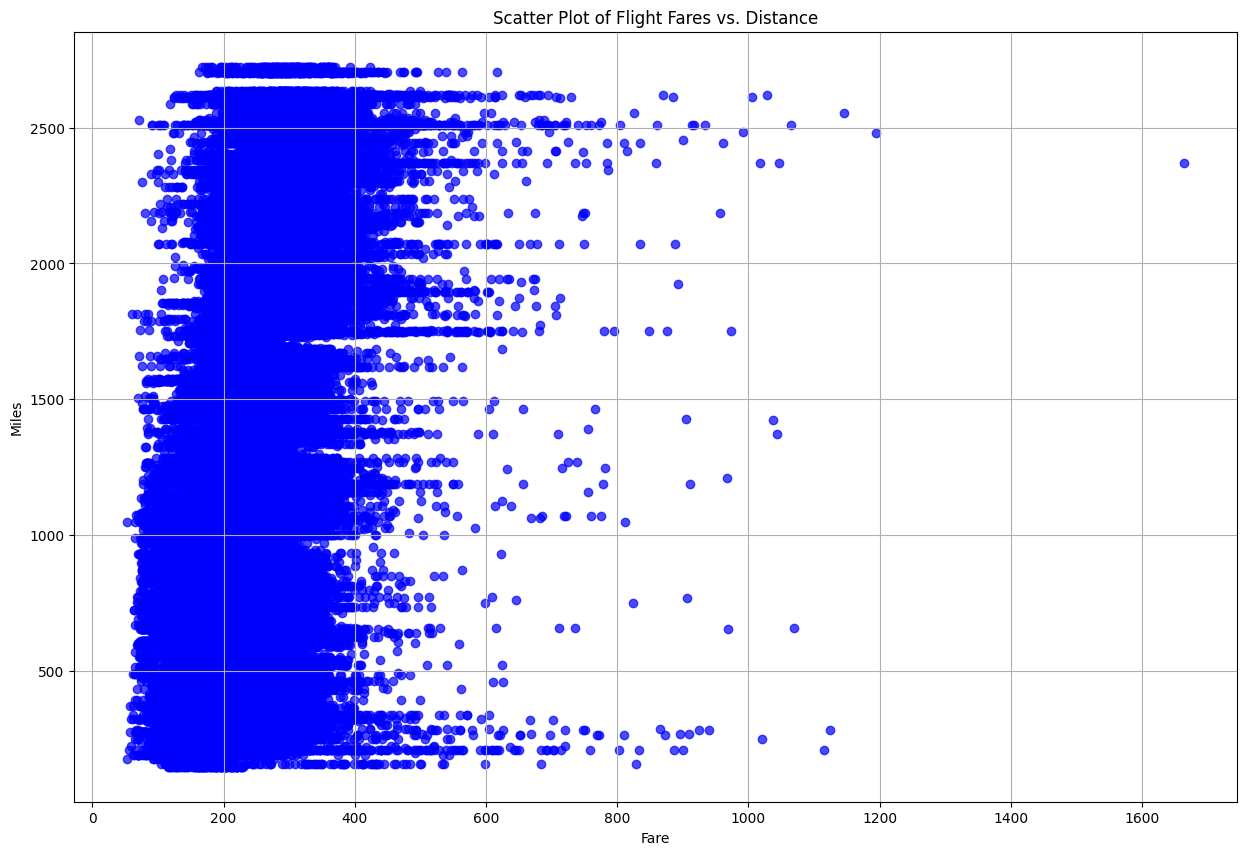

In [437]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Fare'], df['Miles'], alpha=0.7, color='b')
plt.title('Scatter Plot of Flight Fares vs. Distance')
plt.xlabel('Fare')
plt.ylabel('Miles')
plt.grid(True)
plt.show()

 - Plot a correlation matrix heatmap

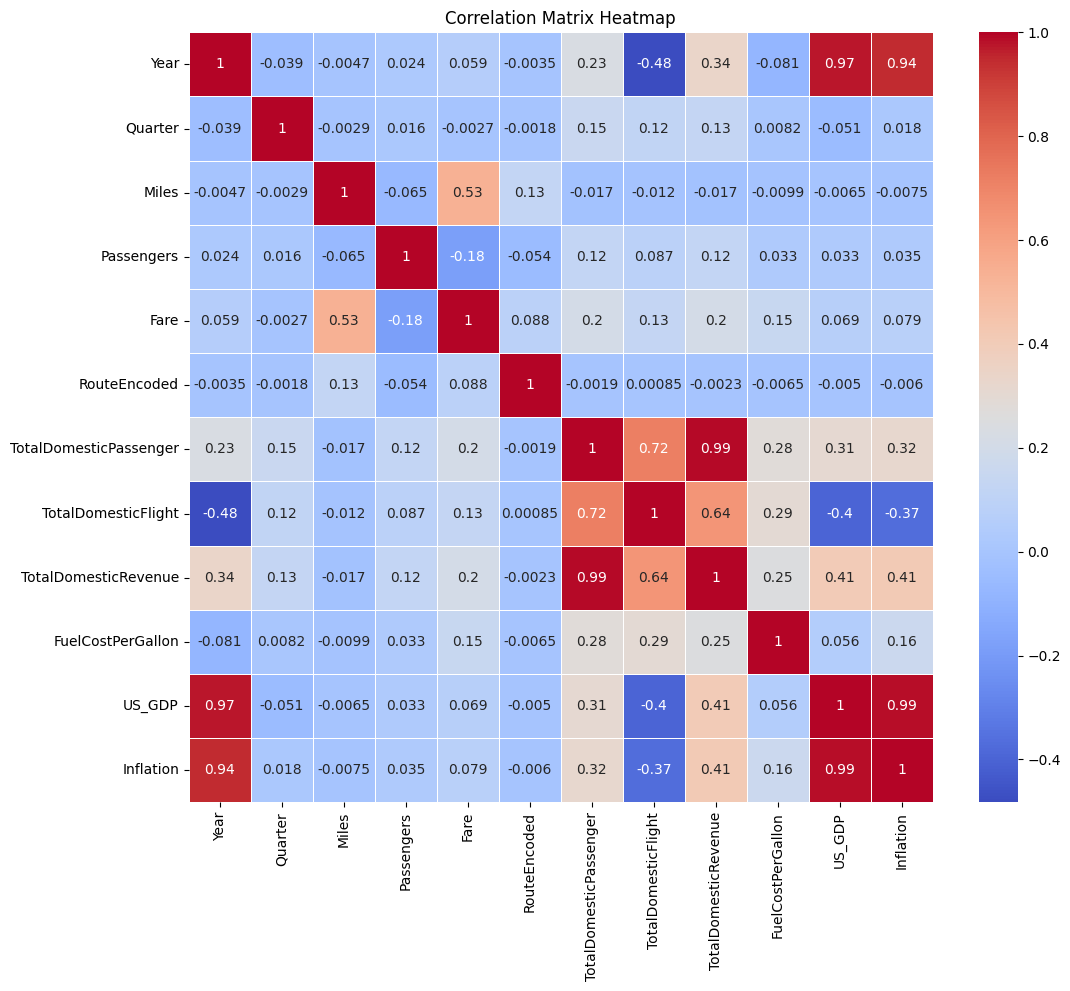

In [438]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()